In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import time


In [4]:
file_path = 'datasets/StudentScore.xls'
df = pd.read_csv(file_path)
x = df[["reading score"]]
y = df[["writing score"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
imputer = SimpleImputer(missing_values=-1.0, strategy='median')
x_train["reading score"] = imputer.fit_transform(x_train[["reading score"]])

## Compute Cost and Minimize MSE Parameter Using `Ternary Search` (Competitive Programming)
The equation for cost with one variable is:
$$
J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}
$$ 
 
 
$$
f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}
$$
  
+ $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
+ $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
+ These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

**Note:** In this lab, the bias parameter $b$ is set to 0 to make visualization and understanding easier.

In this lab, i use ternary search to find the values of (w) that minimize the cost of function (1)
with complexity: 
$$
  O(log_3(\frac{R - L}{ε}) \cdot len(\text{input features}))
$$
+ where R is the right endpoint of the search range, L is the left endpoint, and ε is the precision.

In [5]:
def compute_loss_value(x, y, w, b = 0):
    """
    Computes the total squared error (loss) between the predicted and target values

    Args: 
        x : Input feature values
        y : Actual target values
        w : Wieght parameter for the linear model

    Returns:
        float: the sum of squared differances between the predicted and target values
    
    Designed by [Nghiem Quang Huy]
    """
    m = len(x)
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2 
    return total_cost

### Use ternary search to find W that minimizes the cost function (1)

In [6]:

def ternary_search(x, y): 
    """
    Find the value of the weight parameter w that minimizes the total cost between 
    predicted and actual target values using ternary search.

    Args:
        x : Input feature values.
        y : Actual target values.
        
    Returns:
        float: The value of w that minimizes the loss function.
    
    Designed by [Nghiem Quang Huy]
    """
    J_history = []
    lo = -10.0
    hi = 10.0
    mn_w = -1
    while hi - lo > 1e-10:
        m1 = (2*lo + hi) / 3.0
        m2 = (lo + 2*hi) / 3.0
        if compute_loss_value(x, y, m1) > compute_loss_value(x, y, m2):
            J_history.append(compute_loss_value(x, y, m2))
            mn_w = m2
            lo = m1
        else:
            J_history.append(compute_loss_value(x, y, m1))
            mn_w = m1
            hi = m2
    return mn_w, J_history


start_time = time.time()
W, J_hist = ternary_search(np.ravel(x_train), np.ravel(y_train))
end_time = time.time() - start_time
W

0.9841449002290924

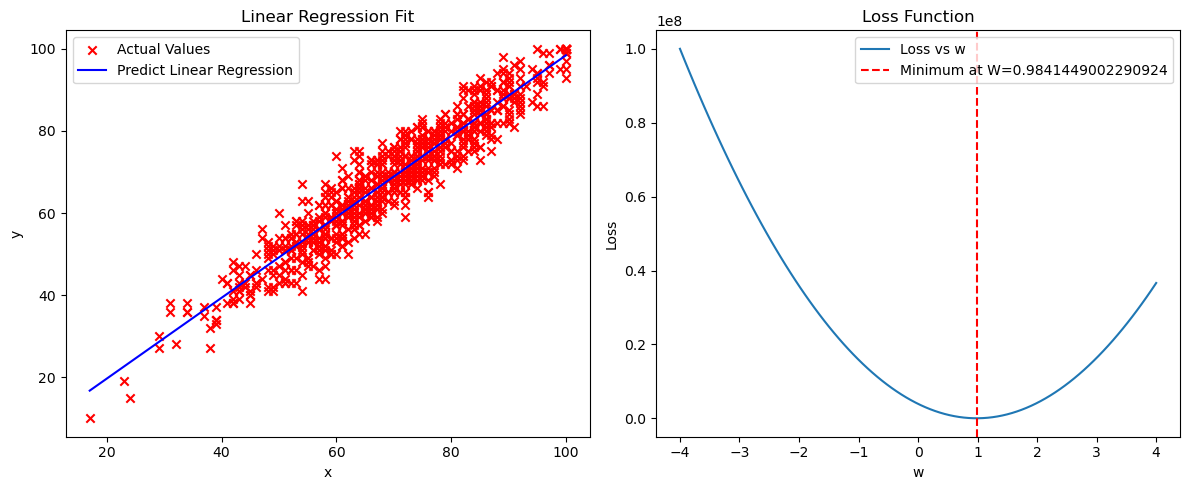

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_plot = np.ravel(x_train)
y_plot = np.ravel(y_train)

ax1.scatter(x_plot, y_plot, marker='x', c='r', label='Actual Values')
x_line = np.linspace(np.min(x_plot), np.max(x_plot), 100)
y_line = W * x_line + 0
ax1.plot(x_line, y_line, color='blue', label='Predict Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Linear Regression Fit')


w_values = np.linspace(-4, 4, 100)
loss_values = [compute_loss_value(x_plot, y_plot, w) for w in w_values]
ax2.plot(w_values, loss_values, label='Loss vs w')
ax2.axvline(W, color='red', linestyle='--', label=f'Minimum at W={W}')
ax2.set_xlabel('w')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Loss Function')

plt.tight_layout()

Text(0.5, 0, 'step')

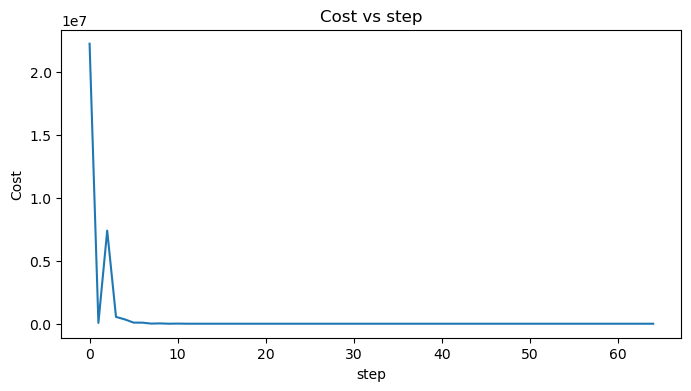

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(J_hist[:100000])
ax.set_title("Cost vs step")
ax.set_ylabel('Cost')
ax.set_xlabel('step')


### Total loss

In [9]:
compute_loss_value(np.ravel(x_train), np.ravel(y_train), W, 0)

17021.222693905933

### Execution time

In [10]:
end_time

0.037334442138671875